In [1]:
import os, glob
import numpy as np

from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import Rank2D
from yellowbrick.features.pca import PCADecomposition

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import h5py
import pandas as pd

from GNN.inputs import split

/cosma/local/Python/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


ModuleNotFoundError: No module named 'GNN'

In [4]:
hdf5_filename = "/cosma5/data/dp004/dc-cues1/features/halo_features_s99"
with h5py.File(hdf5_filename, "r+") as feats:
    features = np.column_stack(
        [
            feats["M200c"][:],
            feats["R200c"][:],
            feats["N_subhalos"][:],
            feats["VelDisp"][:],
            feats["Vmax"][:],
            feats["Spin"][:],
            feats["Fsub"][:],
            feats["x_offset"][:],

        ]
    )
    
    positions = feats['Pos'][:] / 1000.
    boxsize = feats['boxsize'].value / 1000. # to Mpc

    #labels = np.log10(feats["stellar_mass"][:] + 1 )
    labels = feats['Ngals'][:]
    labels = labels > 0 

In [5]:
feature_names = ['M200c', 'R200c', 'N_subhalos', 'VelDisp', 'Vmax', 'Spin', 'Fsub', 'x_offset']

In [6]:
train_idx, test_idx, val_idx = split.train_test_val_split(
    labels.shape[0],
    train_size = 0.5,
)

test_idx = np.concatenate((test_idx, val_idx))
train_features = features[train_idx, :]
train_labels = labels[train_idx]
test_features = features[test_idx, :]
test_labels = labels[test_idx]

NameError: name 'split' is not defined

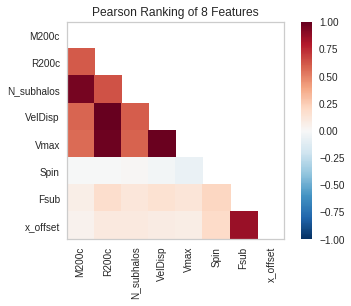

In [8]:
visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(features, labels)
visualizer.transform(features)  
visualizer.poof()  